# Iris Flower Dataset

## _Exploratory Data Analysis_

**Author:** Gerley Adriano

This notebook contains an exploratory data analysis (EDA) of the Iris flower dataset. The goal is to gain a better understanding of the data structure, identify patterns, relationships, and important insights.

The Iris flower dataset contains information about three species of Iris flowers (setosa, versicolor, and virginica). Each flower is described by four attributes: sepal length, sepal width, petal length, and petal width.

The exploratory data analysis is divided into three main sections:

1. Visualizations: In this section, we will explore charts and visualizations of the data to understand the distribution of attributes, relationships between them, and differences among flower species.

2. Statistical Analysis: Here, we will perform statistical analyses to gain additional insights about the data. This may include tests for normality, correlation analysis between attributes, and other relevant statistical techniques.

3. Feature Engineering: If applicable, in this section, we will explore feature engineering techniques to create new variables or transform existing attributes. The goal is to improve the data representation and potentially achieve better performance in machine learning models.

At the end of each section, explanatory comments and conclusions will be provided regarding the obtained results. The aim is to create a deeper understanding of the data and establish a solid foundation for the subsequent steps of classification and clustering.

This notebook is part of a GitHub repository dedicated to developing a portfolio for a career in data science. The repository contains various classification and clustering approaches using the Iris flower dataset.

Note: Make sure you have installed the necessary libraries such as pandas, numpy, matplotlib, and seaborn to run this notebook. Further instructions and details can be found in the repository's README file.


In [61]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.datasets import load_iris # dataset for classification problem
import scipy.stats as stats # used for statistical analysis

In [2]:
# load iris dataset
iris = load_iris()
data = iris.data
target = iris.target

## 1. Data Visualization

In this section, we will explore the data using charts and visualizations. The goal is to gain a better understanding of the data structure, identify patterns, relationships, and important insights.

### 1.1 Sepal Length vs Sepal Width

Let's start by plotting the sepal length vs sepal width for each flower species. The goal is to identify patterns and differences among the species.

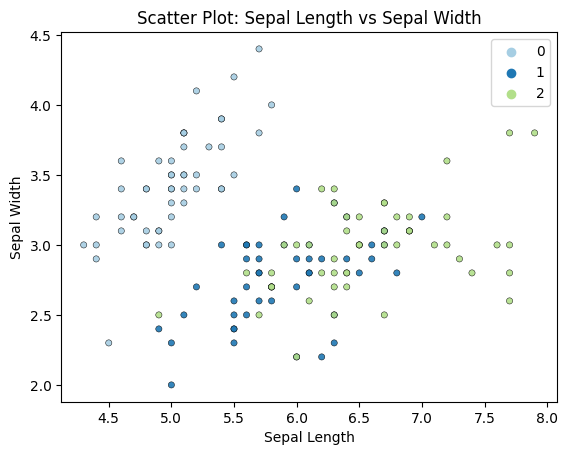

In [14]:
# Show the scatter plot of sepal length vs sepal width
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=target, palette='Paired',
                edgecolor='k', s=20, alpha=0.9, legend='full', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.show()

### 1.2 Species Counts

Let's plot the number of flowers for each species. The goal is to understand the distribution of the data and identify potential imbalances.

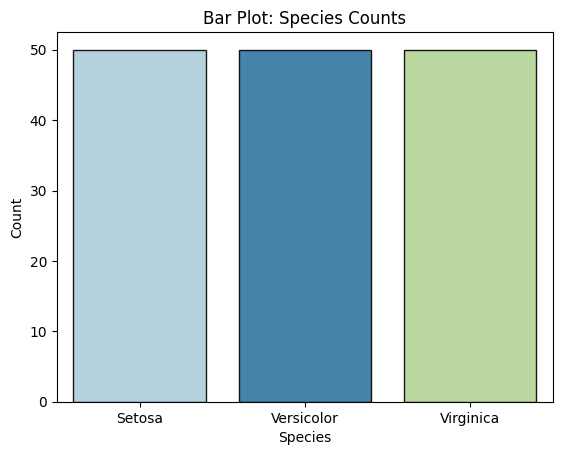

In [16]:
species_counts = np.bincount(target)
species_labels = ['Setosa', 'Versicolor', 'Virginica']

sns.barplot(x=species_labels, y=species_counts, palette='Paired', edgecolor='k', alpha=0.9)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Bar Plot: Species Counts')
plt.show()

### 1.3 Pair plot of all attributes

Let's plot a pair plot of all attributes. The goal is to identify patterns and relationships among the attributes.

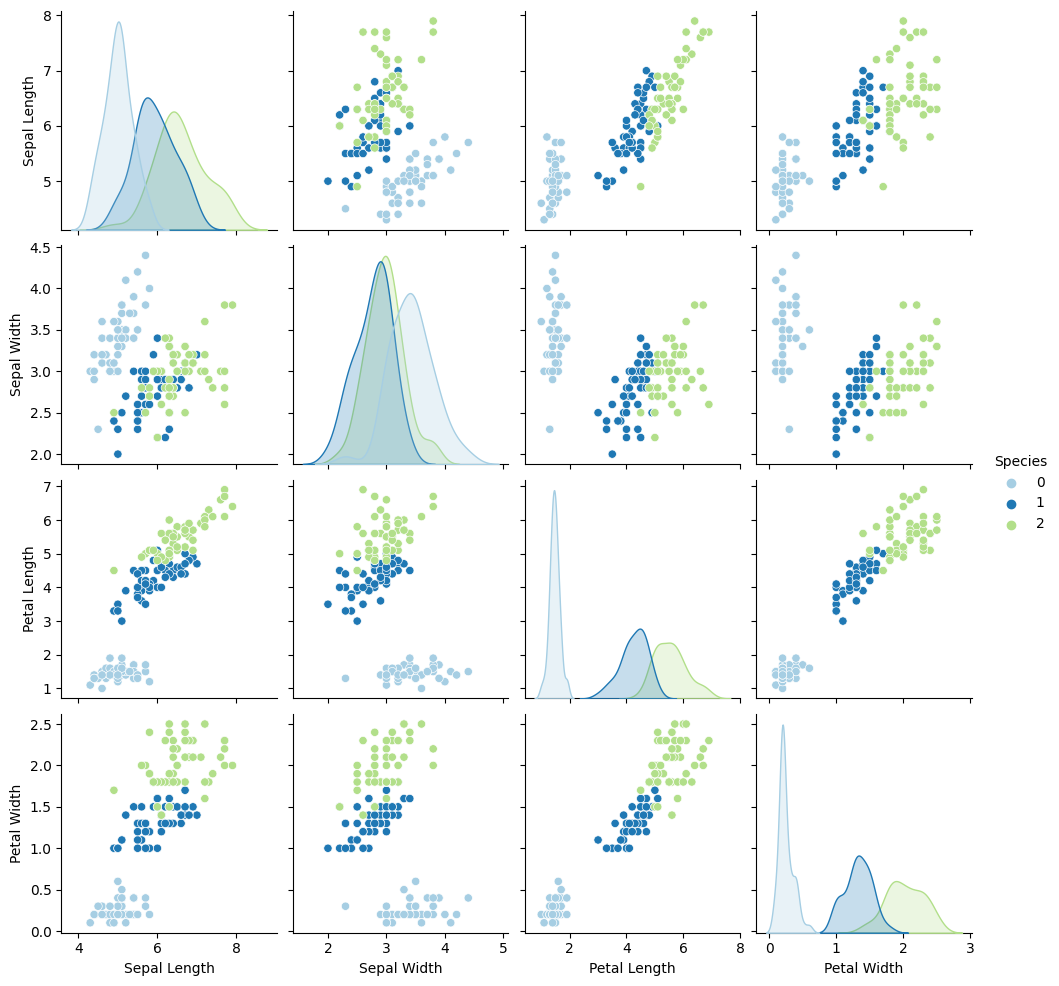

In [26]:
# Show the pair plot of all features
df = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Species'] = target

sns.pairplot(df, hue='Species', palette='Paired')
plt.show()

### 1.4 Petal Length by Species

Let's plot the petal length for each species. The goal is to identify patterns and differences among the species.

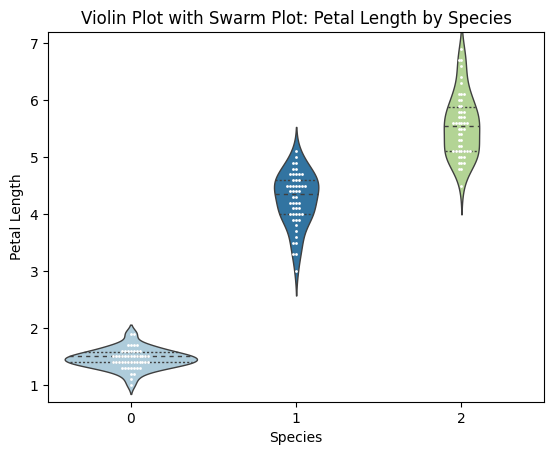

In [33]:
# Show the violin plot of petal length by species
sns.violinplot(x=target, y=data[:, 2], palette='Paired', inner='quartile', linewidth=1, edgecolor='k', alpha=0.9)
sns.swarmplot(x=target, y=data[:, 2], color='white', edgecolor='gray', size=2)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Violin Plot with Swarm Plot: Petal Length by Species')
plt.show()

### 1.5 Correlation Matrix

In this section, we will plot a correlation matrix to identify relationships among the attributes. The goal is to identify attributes that are highly correlated and may be redundant.

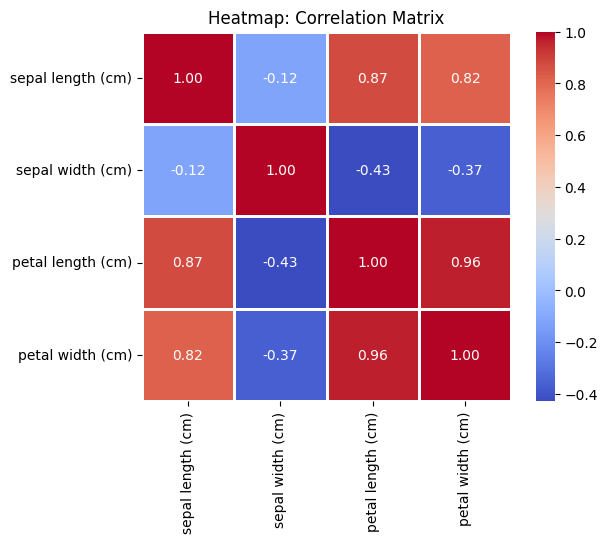

In [36]:
# Show the heatmap of correlation matrix
correlation_matrix = np.corrcoef(data.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=2, linecolor='white'
            , xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Heatmap: Correlation Matrix')
plt.show()

### 1.6 Clustermapping

Lets plot a clustermapping to identify patterns and relationships among the attributes. The goal is to identify attributes that are highly correlated and may be redundant.

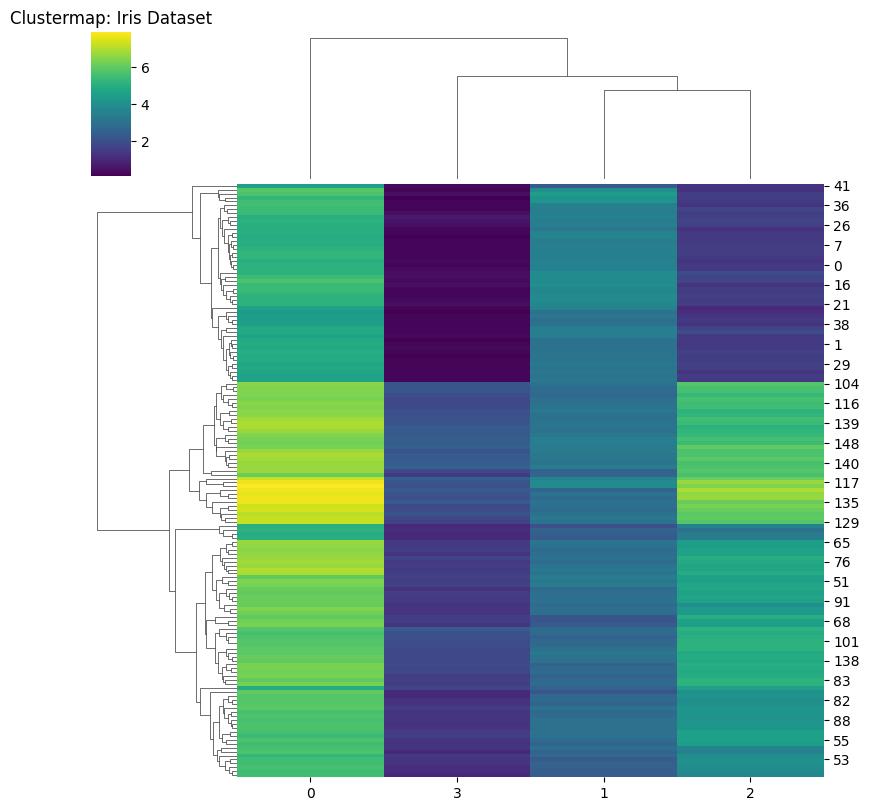

In [40]:
g = sns.clustermap(data, cmap='viridis', figsize=(8, 8))
plt.title('Clustermap: Iris Dataset')
plt.show()

### 1.7 Joint Distribution Plot: Sepal Length vs Petal Length

Let's plot a joint distribution plot of sepal length vs petal length. The goal is to identify patterns and relationships among the attributes.

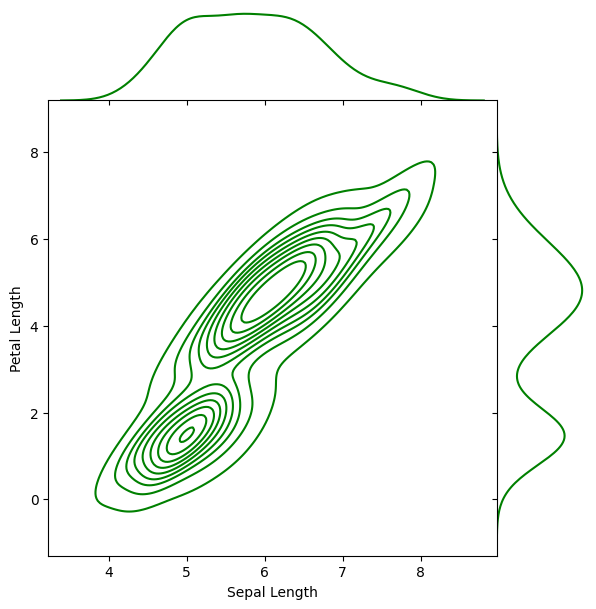

In [42]:
# Show the joint plot of sepal length vs petal length
sns.jointplot(x=data[:, 0], y=data[:, 2], kind='kde', space=0, palette='Paired', color='g')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

### 1.8 Hexbin Plot: Sepal Length vs Petal Length

In this section, we will plot a hexbin plot of sepal length vs petal length. The goal is to identify patterns and relationships among the attributes.

The hexbin plot is similar to a scatter plot but uses hexagonal bins to represent the data. This is useful when the data is too dense and a scatter plot would not be informative.

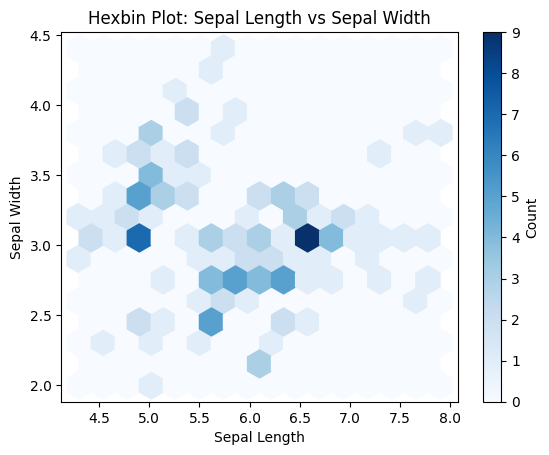

In [48]:
plt.hexbin(data[:, 0], data[:, 1], gridsize=15, cmap='Blues')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hexbin Plot: Sepal Length vs Sepal Width')
plt.colorbar(label='Count')
plt.show()

## 2. Statistical Analysis

In this section, we will perform statistical analyses to gain additional insights about the data. This may include tests for normality, correlation analysis between attributes, and other relevant statistical techniques.

### 2.1 Pearson Correlation

Let's perform a Pearson correlation analysis to identify relationships among the attributes.

In [60]:
df = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

              Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      1.000000    -0.117570      0.871754     0.817941
Sepal Width      -0.117570     1.000000     -0.428440    -0.366126
Petal Length      0.871754    -0.428440      1.000000     0.962865
Petal Width       0.817941    -0.366126      0.962865     1.000000


### 2.2 ANOVA - Hypothesis Testing

The ANOVA test is used to compare the means of two or more groups. In this section, we will perform an ANOVA test to determine if there are significant differences in the means of the attributes for each flower species.

In [62]:
setosa = data[target == 0]
versicolor = data[target == 1]
virginica = data[target == 2]

statistic, p_value = stats.f_oneway(setosa[:, 0], versicolor[:, 0], virginica[:, 0])
print("One-way ANOVA p-value for Sepal Length:", p_value)

One-way ANOVA p-value for Sepal Length: 1.6696691907693826e-31


### 2.3 Shapiro-Wilk Test - Normality

The Shapiro-Wilk test is a statistical test that tests the null hypothesis that the data was drawn from a normal distribution.

In [63]:
_, p_value = stats.shapiro(data[:, 0])
print("Shapiro-Wilk p-value for Sepal Length:", p_value)

Shapiro-Wilk p-value for Sepal Length: 0.01018026564270258


### 2.4 Regression Analysis

The regression line is a useful tool to identify relationships between attributes. Let's plot a regression line for sepal length vs sepal width.

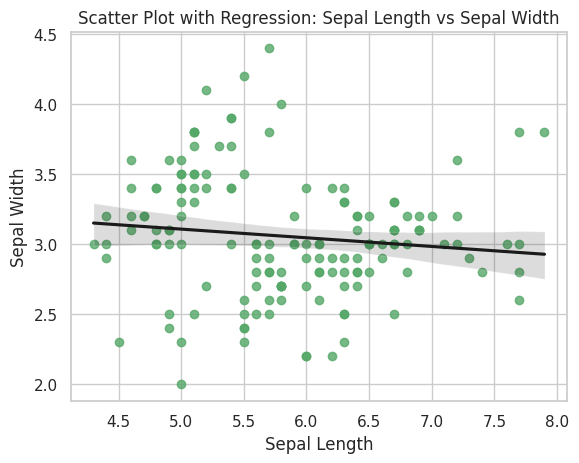

In [69]:
sns.regplot(data=df, x='Sepal Length', y='Sepal Width', color='g', line_kws={'color': 'k'}, ci=95)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot with Regression: Sepal Length vs Sepal Width')
plt.show()

## 3. Feature Engineering Visualizations

The feature engineering step is used to create new variables or transform existing attributes. The goal is to improve the data representation and potentially achieve better performance in machine learning models.

### 3.1 Mean Petal Width by Sepal Length Category

The mean petal width by sepal length category is a new variable that can be used to improve the data representation. Let's create this variable and plot it.

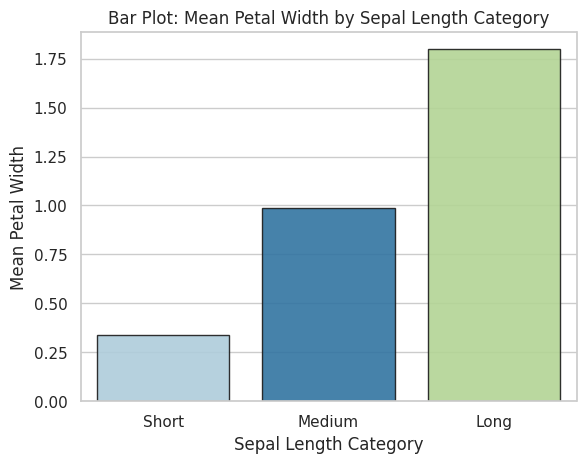

In [76]:
df['Sepal Length Category'] = pd.cut(df['Sepal Length'], bins=[4, 5, 6, 7], labels=['Short', 'Medium', 'Long'])
grouped_data = df.groupby('Sepal Length Category')['Petal Width'].mean().reset_index()

sns.barplot(data=grouped_data, x='Sepal Length Category', y='Petal Width', palette='Paired', edgecolor='k', alpha=0.9)
plt.xlabel('Sepal Length Category')
plt.ylabel('Mean Petal Width')
plt.title('Bar Plot: Mean Petal Width by Sepal Length Category')
plt.show()